In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
data = pd.read_csv('./commodity_trade_statistics_data.csv')

/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(10)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals
5,Albania,2016,10511,"Fowls, live domestic < 185 grams",Import,2671732,254652.0,Number of items,5629138.0,01_live_animals
6,Albania,2016,10511,"Fowls, live domestic < 185 grams",Export,87581,5320.0,Number of items,115180.0,01_live_animals
7,Albania,2016,10519,"Poultry, live except domestic fowls, < 185 grams",Import,26485,2908.0,Number of items,64000.0,01_live_animals
8,Albania,2016,10591,"Fowls, live domestic > 185 grams",Import,2421513,1926850.0,Number of items,1006990.0,01_live_animals
9,Albania,2016,10599,"Poultry, live except domestic fowls, > 185 grams",Import,251318,211177.0,Number of items,205124.0,01_live_animals


In [4]:
data.dtypes

country_or_area     object
year                 int64
comm_code           object
commodity           object
flow                object
trade_usd            int64
weight_kg          float64
quantity_name       object
quantity           float64
category            object
dtype: object

In [6]:
# Flow is a categorical variable
data['flow'] = data['flow'].astype('category')

In [7]:
data.shape

(8225871, 10)

In [8]:
# Check for NA colums
data.isnull().sum()

country_or_area         0
year                    0
comm_code               0
commodity               0
flow                    0
trade_usd               0
weight_kg          128475
quantity_name           0
quantity           304857
category                0
dtype: int64

In [9]:
is_export = data['flow'] == 'Export'
is_reexport = data['flow'] == 'Re-Export'
is_import = data['flow'] == 'Import'
is_reimport = data['flow'] == 'Import'

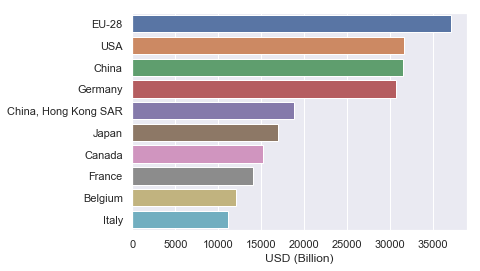

In [11]:
# Countries with highest export
highest_export_countries_series = data[is_export | is_reexport].groupby('country_or_area')['trade_usd'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=highest_export_countries_series.index, x=highest_export_countries_series.divide(pow(10, 9)).values, orient="h")
# plt.xticks(rotation=90)
plt.xlabel("USD (Billion)");
plt.ylabel("");

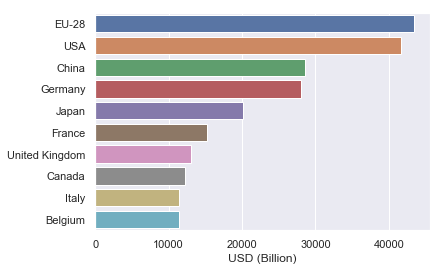

In [12]:
# Countries with highest import
highest_import_countries = data[is_import | is_reimport].groupby('country_or_area')['trade_usd'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=highest_import_countries.index, x=highest_import_countries.divide(pow(10, 9)).values, orient='h')
#plt.xticks(rotation=90)
plt.xlabel("USD (Billion)");
plt.ylabel("");

In [13]:
# Let's normalize commodity name a bit, and leave only first category
data['commodity1'] = data['commodity'].str.split(', ', expand=True)[0]

In [14]:
data.head(5)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,commodity1
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals,Sheep
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals,Goats
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals,Bovine animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals,Bovine animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals,Swine


In [17]:
grouped_commodities = data.groupby(['commodity1'])['trade_usd'].sum().sort_values(ascending=False)
grouped_commodities = grouped_commodities.iloc[2:] # Skip the first two, because they are unlabeled ones

Text(0.5, 1.0, 'Most traded commodities')

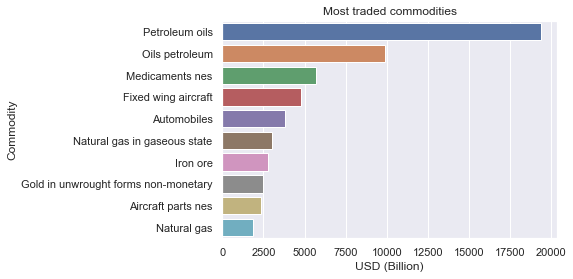

In [19]:
sns.barplot(x=grouped_commodities.head(10).divide(pow(10,9)).values, y=grouped_commodities.head(10).index, orient='h')
plt.xlabel("USD (Billion)");
plt.ylabel("Commodity");
plt.title("Most traded commodities")

# EDA on Serbian data

In [22]:
serbia = data[data['country_or_area'] == 'Serbia'].copy()

In [49]:
grouped_yearly_by_flow = serbia.groupby(['year', 'flow'])[['trade_usd', 'flow']].sum()
grouped_yearly_by_flow['trade_usd'] = grouped_yearly_by_flow['trade_usd'] / pow(10, 9)

In [50]:
serbia.year.sort_values().unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016])

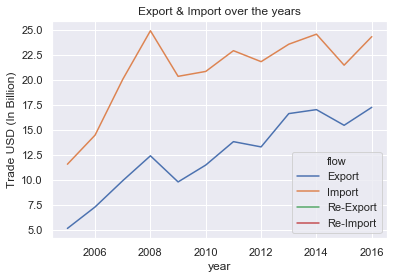

In [52]:
sns.lineplot(x='year', y='trade_usd', hue='flow', ci=None, data=grouped_yearly_by_flow.reset_index())
plt.title("Export & Import over the years")
plt.ylabel("Trade USD (In Billion)");

## What are the most traded commodities in serbia?

In [54]:
serbia_import = serbia[(serbia['flow'] == 'Import') & (serbia['commodity1'] != 'ALL COMMODITIES') & (serbia['category'] != '99_commodities_not_specified_according_to_kind')]
serbia_export = serbia[(serbia['flow'] == 'Export') & (serbia['commodity1'] != 'ALL COMMODITIES') & (serbia['category'] != '99_commodities_not_specified_according_to_kind')]

In [55]:
# Draws a summarized chart data
def draw_summarized_chart(data, title):
    sns.barplot(y=data.index, x=data.values, orient='h')
    plt.ylabel("");
    plt.title(title)

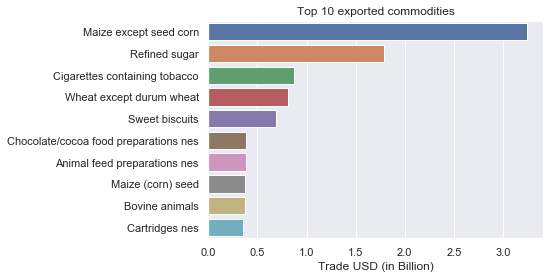

In [66]:
serbia_top10_export = serbia_export.groupby('commodity1').sum()['trade_usd'].sort_values(ascending=False).head(10) / pow(10, 9)

draw_summarized_chart(serbia_top10_export, "Top 10 exported commodities")
plt.xlabel("Trade USD (in Billion)");

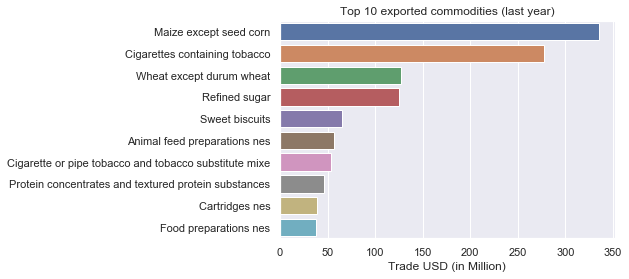

In [67]:
# Get top 10 exported commodities in last year

serbia_top10_export_last_year = serbia_export[serbia_export['year'] == 2016].groupby('commodity1').sum()['trade_usd'].sort_values(ascending=False).head(10) / pow(10, 6)

draw_summarized_chart(serbia_top10_export_last_year, "Top 10 exported commodities (last year)")
plt.xlabel("Trade USD (in Million)");

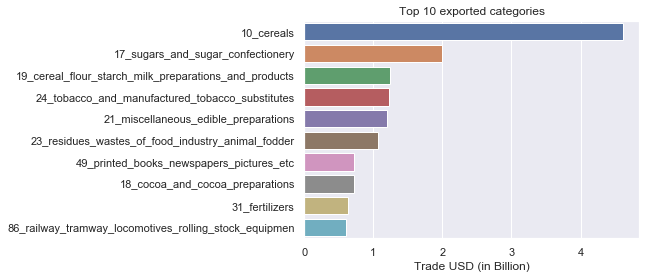

In [68]:
# Top 10 commodities by category
serbia_top10_categories_exported_last_year = serbia_export.groupby('category').sum()['trade_usd'].sort_values(ascending=False).head(10) / pow(10, 9)

draw_summarized_chart(serbia_top10_categories_exported_last_year, "Top 10 exported categories")
plt.xlabel("Trade USD (in Billion)");

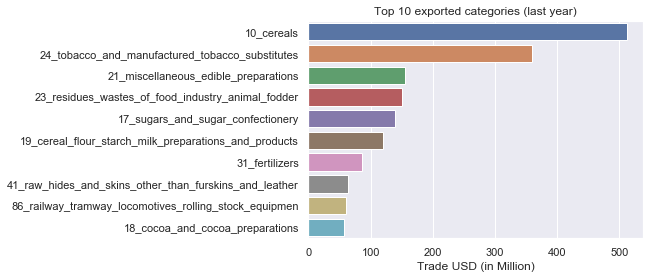

In [71]:
# Top 10 commodities by category (in 2016)
serbia_top10_categories_exported_last_year = serbia_export[serbia_export['year'] == 2016].groupby('category').sum()['trade_usd'].sort_values(ascending=False).head(10) / pow(10, 6)

draw_summarized_chart(serbia_top10_categories_exported_last_year, "Top 10 exported categories (last year)")
plt.xlabel("Trade USD (in Million)");

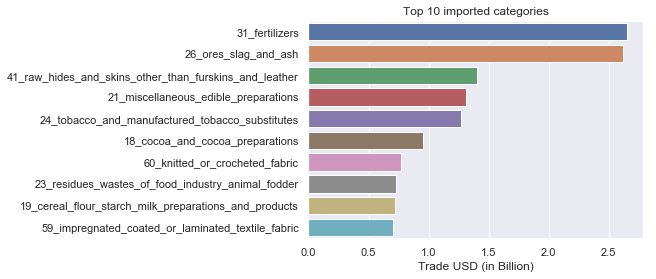

In [73]:
# What are we importing the most?
serbia_top10_categories_import_last_year = serbia_import.groupby('category').sum()['trade_usd'].sort_values(ascending=False).head(10) / pow(10, 9)

draw_summarized_chart(serbia_top10_categories_import_last_year, "Top 10 imported categories")
plt.xlabel("Trade USD (in Billion)");

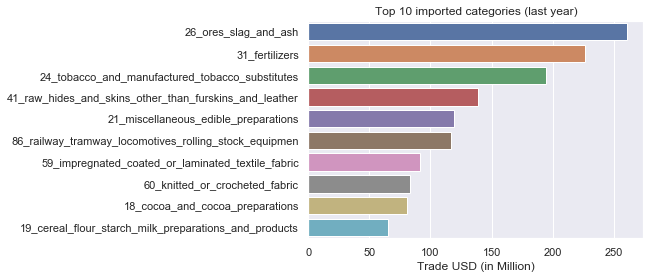

In [75]:
serbia_top10_categories_import_last_year = serbia_import[serbia_import['year'] == 2016].groupby('category').sum()['trade_usd'].sort_values(ascending=False).head(10) / pow(10, 6)

draw_summarized_chart(serbia_top10_categories_import_last_year, "Top 10 imported categories (last year)")
plt.xlabel("Trade USD (in Million)");

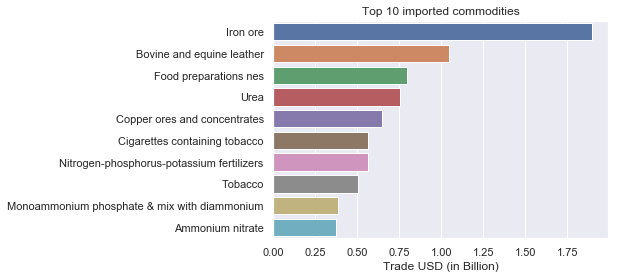

In [76]:
serbia_top10_commodities = serbia_import.groupby('commodity1').sum()['trade_usd'].sort_values(ascending=False).head(10) / pow(10, 9)

draw_summarized_chart(serbia_top10_commodities, "Top 10 imported commodities")
plt.xlabel("Trade USD (in Billion)");

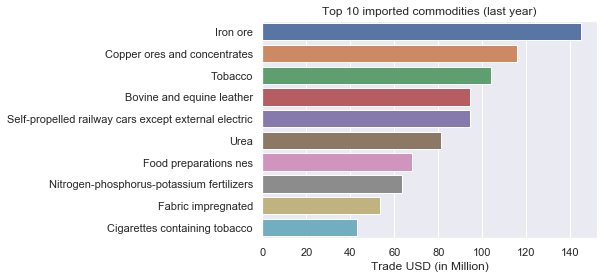

In [77]:
serbia_top10_commodities_import_last_year = serbia_import[serbia_import['year'] == 2016].groupby('commodity1').sum()['trade_usd'].sort_values(ascending=False).head(10) / pow(10, 6)

draw_summarized_chart(serbia_top10_commodities_import_last_year, "Top 10 imported commodities (last year)")
plt.xlabel("Trade USD (in Million)");

# Predictions

Since there's not that much data to play with, for sake of demonstrating some ML algorithms, I'll try forecasting
he export of "Live animals" in USA. This category was really picked out randomly and you could really plug in any
ther Category if you prefer

## Clustering based on animal trade

This is something that I'm actually most proud of. It came to me that I could actually re-arrange the data so that
each observation represents one country, and features represents commodity trade amounts in that year.

Then we can try to cluster the countries and see which ones seem to be similar.

In [156]:
is_export = data['flow'] == 'Export'
is_live_animals = data['category'] == '01_live_animals'
year_filter = data['year'] >= START_YEAR

# Group the data by country, so that we can have faster lookups
by_country = data[year_filter & is_export & is_live_animals].groupby(['country_or_area', 'year']).sum()

In [157]:
START_YEAR = 2000
END_YEAR = 2017

countries_df = pd.DataFrame(index=data.country_or_area.unique())

# Make a DataFrame where index is Country names, and columns are years (i.e. year_2000, year_2001, etc.)
# Values will be commodity trade amounts for that year.

for i in range(START_YEAR, END_YEAR):
    countries_df['year_' + str(i)] = np.nan
    
for year in range(START_YEAR, END_YEAR):
    for country in countries_df.index:
        try:
            trade_usd = by_country.loc[country].loc[year]['trade_usd']
        
            countries_df.loc[country]['year_'+str(year)] = trade_usd
        except:
            pass

In [158]:
countries_df.head(5)

,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10046.0
Albania,31194.0,156509.0,338954.0,35303.0,769695.0,954684.0,1063300.0,821311.0,767554.0,520743.0,609694.0,997424.0,901217.0,846588.0,NaN,636184.0,671606.0
Algeria,NaN,NaN,11075.0,NaN,18751.0,56423.0,44550.0,865.0,52969.0,4853.0,4396.0,NaN,153141.0,14163.0,20466.0,86724.0,126400.0
Andorra,286631.0,136830.0,120732.0,131704.0,179221.0,141496.0,170770.0,116615.0,176892.0,120983.0,93535.0,68199.0,37857.0,60296.0,200316.0,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
countries_df.shape

(209, 17)

In [161]:
clean_prediction_data = countries_df.dropna()
clean_prediction_data.head()

,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
Argentina,15902691.0,17460709.0,7406209.0,7946737.0,10721010.0,12149190.0,16611870.0,28000488.0,36575100.0,33424645.0,2.565840e+07,2.244952e+07,2.608916e+07,1.788630e+07,2.319298e+07,1.947421e+07,3.372653e+07
Australia,461870885.0,532507444.0,634849604.0,630979091.0,609271885.0,623765264.0,664832968.0,779896115.0,942303150.0,904441686.0,1.052354e+09,1.106495e+09,1.084098e+09,1.007219e+09,1.460544e+09,1.423882e+09,1.398836e+09
Bahrain,369462.0,150557.0,280601.0,166793.0,240744.0,302181.0,85324.0,605359.0,2253863.0,2062362.0,6.971010e+05,3.930800e+04,1.468640e+05,1.141889e+06,4.802690e+06,1.223609e+06,3.327892e+06
Barbados,1778897.0,1627035.0,1519755.0,1250105.0,1153341.0,1640660.0,1260605.0,861527.0,1363842.0,1518511.0,8.140370e+05,1.408185e+06,8.581630e+05,8.311490e+05,8.733130e+05,7.053910e+05,8.536290e+05
Belarus,1525200.0,2055500.0,1818000.0,3334700.0,3960600.0,3614100.0,2306800.0,4021400.0,7976800.0,3979100.0,1.460960e+07,3.209510e+07,2.689790e+07,1.127810e+07,2.260800e+06,4.411300e+06,7.070500e+06


In [162]:
countries_df['cluster'] = np.nan

In [163]:
from sklearn.cluster import KMeans

In [164]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(clean_prediction_data)

y_kmeans = kmeans.predict(clean_prediction_data)

In [165]:
i = 0

for country in clean_prediction_data.index:
    cluster = y_kmeans[i]
    countries_df.loc[country]['cluster'] = cluster
    i += 1

By grouping data into two clusters, we can observe the following:

In [175]:
countries_df[countries_df['cluster'] == 0.0]

,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,cluster
Argentina,15902691.0,17460709.0,7406209.0,7946737.0,10721010.0,12149190.0,16611870.0,28000488.0,36575100.0,33424645.0,25658396.0,22449517.0,26089160.0,17886305.0,23192978.0,19474206.0,33726527.0,0.0
Bahrain,369462.0,150557.0,280601.0,166793.0,240744.0,302181.0,85324.0,605359.0,2253863.0,2062362.0,697101.0,39308.0,146864.0,1141889.0,4802690.0,1223609.0,3327892.0,0.0
Barbados,1778897.0,1627035.0,1519755.0,1250105.0,1153341.0,1640660.0,1260605.0,861527.0,1363842.0,1518511.0,814037.0,1408185.0,858163.0,831149.0,873313.0,705391.0,853629.0,0.0
Belarus,1525200.0,2055500.0,1818000.0,3334700.0,3960600.0,3614100.0,2306800.0,4021400.0,7976800.0,3979100.0,14609600.0,32095100.0,26897900.0,11278100.0,2260800.0,4411300.0,7070500.0,0.0
Botswana,233707.0,1247313.0,335675.0,41765.0,11890.0,4319640.0,802750.0,93780.0,466300.0,30076.0,24432.0,10704234.0,3019807.0,4860191.0,2986366.0,864686.0,123773.0,0.0
Bulgaria,12634865.0,9999261.0,17028091.0,16011138.0,21982524.0,15484556.0,26624765.0,31695528.0,33242600.0,29927322.0,45135525.0,93392570.0,33349272.0,24862251.0,18918602.0,26165941.0,43991133.0,0.0
Cambodia,48248.0,1073200.0,1129471.0,1249785.0,1155944.0,10468.0,76983.0,72247.0,103859.0,150862.0,97937.0,406878.0,257371.0,55101.0,64045.0,443375.0,3140451.0,0.0
Chile,12670490.0,12852175.0,9388663.0,7839291.0,9679581.0,9452369.0,8429841.0,8753113.0,10216106.0,10216730.0,11480228.0,7460181.0,6882324.0,6490266.0,10047606.0,46704766.0,26927709.0,0.0
"China, Hong Kong SAR",8478871.0,4784679.0,754546.0,944217.0,297776.0,143796.0,270000.0,621241.0,669200.0,1041546.0,566784.0,503200.0,2005508.0,1248543.0,1750207.0,2379521.0,1373442.0,0.0
Colombia,7954091.0,19167125.0,6964324.0,4598947.0,166916091.0,182438297.0,200608577.0,125975845.0,26415746.0,18050254.0,22202018.0,43660679.0,353972502.0,294087089.0,58325573.0,50363951.0,55295058.0,0.0


In [171]:
countries_df[countries_df['cluster'] == 1.0]

,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,cluster
Canada,1.172112e+09,1.546990e+09,1.593162e+09,9.327090e+08,6.599804e+08,1.266325e+09,1.772424e+09,2.260800e+09,2.192972e+09,1.433360e+09,1.626397e+09,1.435682e+09,1.621261e+09,1.824440e+09,2.445299e+09,1.916830e+09,1.613712e+09,1.0
France,1.419663e+09,1.098756e+09,1.537512e+09,1.894178e+09,1.962671e+09,2.138276e+09,2.207406e+09,2.274144e+09,2.312243e+09,2.283939e+09,2.286582e+09,2.651017e+09,2.490415e+09,2.435325e+09,2.413288e+09,2.216184e+09,2.152628e+09,1.0
Netherlands,5.284512e+08,6.107698e+08,6.318455e+08,7.592928e+08,1.031209e+09,1.175578e+09,1.391662e+09,1.544883e+09,2.044619e+09,2.127578e+09,2.092791e+09,2.620172e+09,2.638863e+09,2.978823e+09,2.653795e+09,2.121732e+09,2.312945e+09,1.0


In [172]:
countries_df[countries_df['cluster'] == 2.0]

,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,cluster
Australia,461870885.0,532507444.0,634849604.0,630979091.0,609271885.0,623765264.0,664832968.0,779896115.0,9.423032e+08,9.044417e+08,1.052354e+09,1.106495e+09,1.084098e+09,1.007219e+09,1.460544e+09,1.423882e+09,1.398836e+09,2.0
Belgium,395011307.0,276323482.0,314376444.0,338153251.0,374004178.0,418388105.0,364513555.0,394494309.0,5.279976e+08,5.562920e+08,5.041189e+08,5.304999e+08,5.138012e+08,6.279661e+08,5.834046e+08,4.825554e+08,5.269865e+08,2.0
Brazil,5686512.0,4916453.0,4155235.0,10087770.0,17683527.0,41812987.0,84249874.0,284913551.0,4.175819e+08,4.711406e+08,6.972779e+08,4.916599e+08,6.425674e+08,7.825979e+08,7.421993e+08,2.781561e+08,2.837528e+08,2.0
China,384807691.0,344492467.0,343878766.0,326570846.0,330251270.0,328771385.0,333048033.0,374811190.0,5.066999e+08,4.418334e+08,4.539627e+08,5.707983e+08,5.828659e+08,5.806246e+08,5.855724e+08,5.977307e+08,6.467382e+08,2.0
Denmark,189330975.0,166842650.0,163069872.0,185535435.0,242553966.0,363044867.0,432850038.0,529447414.0,7.131420e+08,9.403123e+08,8.639078e+08,9.102473e+08,1.178110e+09,1.246174e+09,1.312477e+09,1.016614e+09,1.148401e+09,2.0
Germany,516085000.0,523124000.0,631047000.0,614016000.0,777533000.0,977329000.0,965789000.0,974539000.0,1.052302e+09,1.199750e+09,1.270508e+09,1.647555e+09,1.746768e+09,1.800066e+09,1.772561e+09,1.468941e+09,1.297583e+09,2.0
Ireland,359884767.0,137802114.0,193432978.0,241098558.0,280851938.0,280983600.0,439652746.0,409740307.0,3.650093e+08,4.115032e+08,4.486982e+08,4.970093e+08,4.233313e+08,5.834600e+08,5.282109e+08,4.774764e+08,3.758895e+08,2.0
Mexico,407400288.0,414102339.0,352704790.0,476315232.0,549136078.0,521834971.0,659082001.0,480075599.0,3.156423e+08,3.997055e+08,5.424061e+08,6.348336e+08,7.546680e+08,5.430526e+08,7.724136e+08,8.808892e+08,6.610378e+08,2.0
Spain,297544590.0,261248286.0,259695617.0,263322335.0,365118549.0,361389128.0,363771004.0,391985863.0,4.320104e+08,3.998763e+08,4.533614e+08,5.218888e+08,5.810682e+08,6.357624e+08,6.432300e+08,6.493000e+08,6.933758e+08,2.0
United Kingdom,507456880.0,525390055.0,532084489.0,728343272.0,785876970.0,735239265.0,678982739.0,902444782.0,8.304655e+08,6.740260e+08,5.841416e+08,6.456352e+08,5.780961e+08,6.182577e+08,6.690219e+08,6.748947e+08,6.800278e+08,2.0


Let's try visualizing this by reducing the dimensionality and then plotting the data

In [177]:
from sklearn.decomposition import PCA

In [184]:
pca = PCA(n_components=2)
lower_dimensional_data = pca.fit_transform(clean_prediction_data)

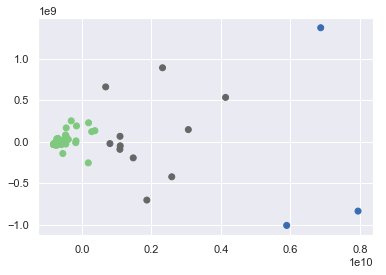

In [212]:
plt.scatter(lower_dimensional_data[:, 0], lower_dimensional_data[:, 1],
            c=countries_df.dropna().cluster.astype('int'),
           cmap=plt.cm.get_cmap('Accent', 3));

## Linear Regression and SVM

In [118]:
country_summary_data = data[(data['country_or_area'] == 'USA') & is_export & is_live_animals][['year', 'trade_usd']].groupby('year').sum()

In [119]:
country_summary_data.head(5)

,trade_usd
year,
1991,692654489
1992,637981181
1993,522006551
1994,590751118
1995,544131807


In [121]:
X_df = country_summary_data[['trade_usd']]
X_df['trade_usd'] = X_df['trade_usd'].astype('float')
X_df.rename(columns={'trade_usd': 'Y'}, inplace=True)
X_df.head(5)

,Y
year,
1991,692654489.0
1992,637981181.0
1993,522006551.0
1994,590751118.0
1995,544131807.0


In [123]:
X_df['X_1'] = X_df['Y'].shift(1)
X_df['X_2'] = X_df['Y'].shift(2)

X_df.head(5)

,Y,X_1,X_2
year,,,
1991,692654489.0,NaN,NaN
1992,637981181.0,692654489.0,NaN
1993,522006551.0,637981181.0,692654489.0
1994,590751118.0,522006551.0,637981181.0
1995,544131807.0,590751118.0,522006551.0


In [124]:
from sklearn.preprocessing import MinMaxScaler

# Prepare the data for training ...
X = X_df.dropna()

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [125]:
X

array([[0.00482798, 0.17772777, 0.25923701],
       [0.10731523, 0.00482798, 0.17772777],
       [0.03781323, 0.10731523, 0.00482798],
       [0.02414053, 0.03781323, 0.10731523],
       [0.26149757, 0.02414053, 0.03781323],
       [0.24497671, 0.26149757, 0.02414053],
       [0.20759766, 0.24497671, 0.26149757],
       [0.51527113, 0.20759766, 0.24497671],
       [0.56466948, 0.51527113, 0.20759766],
       [0.18367694, 0.56466948, 0.51527113],
       [0.40723433, 0.18367694, 0.56466948],
       [0.        , 0.40723433, 0.18367694],
       [0.22719499, 0.        , 0.40723433],
       [0.35199619, 0.22719499, 0.        ],
       [0.34356531, 0.35199619, 0.22719499],
       [0.5079816 , 0.34356531, 0.35199619],
       [0.41449247, 0.5079816 , 0.34356531],
       [0.44147089, 0.41449247, 0.5079816 ],
       [0.77446718, 0.44147089, 0.41449247],
       [1.        , 0.77446718, 0.44147089],
       [0.74654904, 1.        , 0.77446718],
       [0.63456042, 0.74654904, 1.        ],
       [0.

In [126]:
train = X[:-3]
test = X[-3:]

X_train = train[:, 1:]
Y_train = train[:, 0]

X_test = test[:, 1:]
Y_test = test[:, 0]

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [128]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     0.6114634421856651
Model intercept: 0.0907639373977423


In [129]:
predicted = model.predict(X_train)

predicted

array([0.25524796, 0.1319783 , 0.15742267, 0.13698877, 0.11366563,
       0.25585725, 0.29685489, 0.27044227, 0.45052617, 0.54696912,
       0.32464086, 0.37931584, 0.17843561, 0.22968537, 0.35490854,
       0.37662127, 0.47534077, 0.45357204, 0.4499415 , 0.65936462,
       0.86895899])

In [130]:
mean_squared_error(Y_train, predicted)

0.035755071757392606

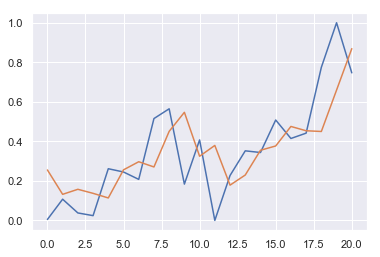

In [131]:
plt.plot(range(len(Y_train)), Y_train)
plt.plot(range(len(Y_train)), predicted)

In [133]:
test_predicted = model.predict(X_test)

mean_squared_error(Y_test, test_predicted)

0.033109687356271296

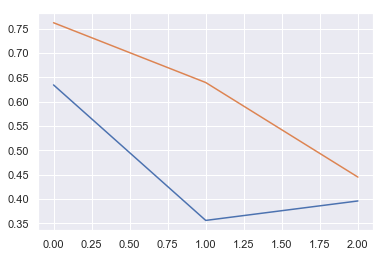

In [134]:
plt.plot(range(len(Y_test)), Y_test)
plt.plot(range(len(Y_test)), test_predicted)

### SVM

Let's try the same but with SVM algorithm

In [136]:
from sklearn.svm import LinearSVR

In [137]:
model = LinearSVR(random_state=0)
model.fit(X_train, Y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=0.0001, verbose=0)

In [138]:
predicted = model.predict(X_train)
mean_squared_error(Y_train, predicted)

0.03772471426983313

In [139]:
test_predicted = model.predict(X_test)
mean_squared_error(Y_test, test_predicted)

0.018883744054398174

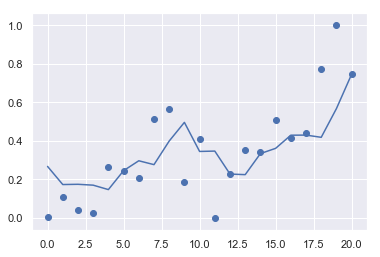

In [141]:
plt.scatter(range(len(Y_train)), Y_train)
plt.plot(range(len(Y_train)), model.predict(X_train))

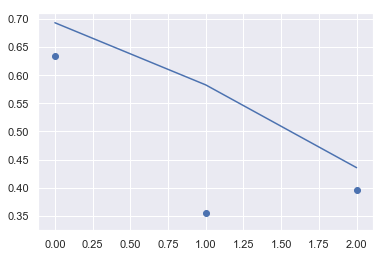

In [144]:
plt.scatter(range(len(Y_test)), Y_test)
plt.plot(range(len(Y_test)), model.predict(X_test))

## Neural Networks

In [85]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [80]:
is_export = data['flow'] == 'Export'
is_live_animals = data['category'] == '01_live_animals'

country_summary_data = data[(data['country_or_area'] == 'USA') & is_export & is_live_animals][['year', 'trade_usd']].groupby('year').sum()

In [81]:
country_summary_data.head(10)

,trade_usd
year,
1991,692654489
1992,637981181
1993,522006551
1994,590751118
1995,544131807
1996,534960679
1997,694170785
1998,683089218
1999,658016767


In [82]:
country_summary_data.index.sort_values()[0] # First
country_summary_data.index.sort_values()[-1] # Last
country_summary_data.index.sort_values()[-2:] # Last two
country_summary_data.index.sort_values()[:-2] # All but last two

# We are going to predict the yearly trade based on previous year's amounts
all_data = country_summary_data.sort_index()['trade_usd'].astype('float').values
train_data = all_data[:-1] # All data excluding last year
actual = all_data[-1:] # Only last year

countries = data[is_export & is_live_animals]['country_or_area'].unique()

In [86]:
# Make a dataset where index is countries names and columns will be predictions from different models

countries_df = pd.DataFrame(index=countries)

# Prediction algorithms

prediction_algorithms = {
    'autoregression':  AR(train_data),
    'arma': ARMA(train_data, order=(0, 1)),
    'arima': ARIMA(train_data, order=(1, 1, 1)),
    'sarimax': SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
}

In [88]:
for k, model in prediction_algorithms.items():
    print("Training algorithm: " + k)
    model_fit = model.fit()
    predicted = model_fit.predict(len(train_data), len(train_data))
    
    diff = actual - predicted
    
    print("Predicted: " + str(predicted[0]) + ", Actual: " + str(actual[0]) + ", Diff: " + str(diff[0]))

Training algorithm: autoregression
Predicted: 740520393.0744236, Actual: 784223079.0, Diff: 43702685.92557645
Training algorithm: arma
Predicted: 711851159.9990355, Actual: 784223079.0, Diff: 72371919.00096452
Training algorithm: arima
Predicted: 31160910.38336785, Actual: 784223079.0, Diff: 753062168.6166321
Training algorithm: sarimax
Predicted: 783464871.6479359, Actual: 784223079.0, Diff: 758207.3520641327


/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


## Try ANN

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


In [92]:
TRAIN_SIZE = 20

In [93]:
all_data_df = pd.DataFrame(all_data, columns=['X'])

In [94]:
train = all_data_df[:TRAIN_SIZE] # First 20 samples for training
test = all_data_df[TRAIN_SIZE:] # Last 20 samples for testing

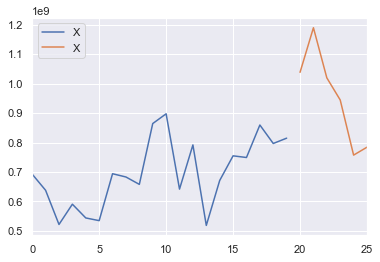

In [95]:
ax = train.plot()
test.plot(ax=ax)

In [96]:
scaler = MinMaxScaler(feature_range=(-1, 1))

train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [97]:
# Prepare training and test data. Idea is that X - 1 predicts Y (i.e previous value predicts next one)
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [98]:
nn_model = Sequential()
# nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1, input_dim=1))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.


In [99]:
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
19/19 [==============================] - 1s 30ms/step - loss: 2.9060
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 2.8145
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 2.7374
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 2.6635
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 2.5923
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 2.5237
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 2.4576
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 2.3939
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 2.3325
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 2.2735
Epoch 11/100
19/19 [==============================] - 0s 1ms/step - loss: 2.2166
Epoch 12/100
19/19 [==============================] - 0s 1ms/step - l

19/19 [==============================] - 0s 1ms/step - loss: 0.5983
Epoch 99/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5938
Epoch 100/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5894


In [101]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	-0.504
The R2 score on the Test set is:	-6.051


In [102]:
nn_y_pred_test = nn_model.predict(X_test)

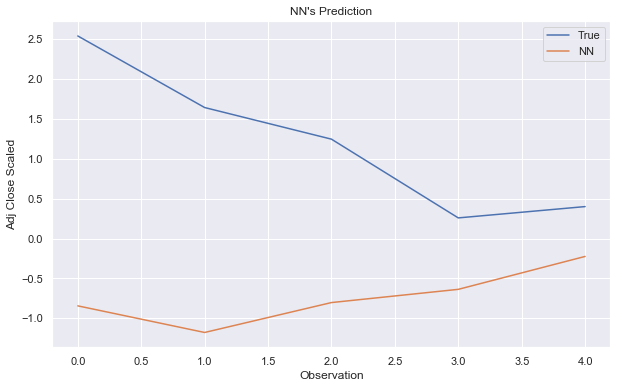

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

## Try LSTM

In [108]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
    
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [109]:
print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (19, 1, 1)
Test shape:  (5, 1, 1)


In [110]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
19/19 [==============================] - 2s 102ms/step - loss: 0.3932
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3853
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3798
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3749
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3705
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3666
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3631
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3600
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3572
Epoch 10/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3548
Epoch 11/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3526
Epoch 12/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3506
Epoch 13/100
19/19 [===============

In [111]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.170
The R2 score on the Test set is:	0.214


In [112]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

5/5 [==============================] - 0s 59ms/step
NN: 4.963326
LSTM: 0.553019


In [113]:
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

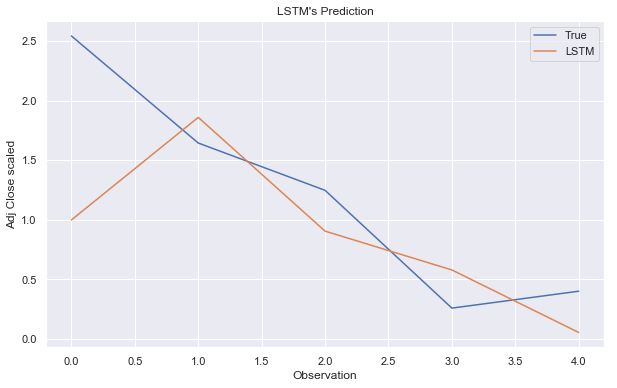

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();